


# 420 Fall 2023 : Homework 4, Coding

There are five sections below, corresponding to three coding assignments. Implement and test (note that Problem 11 is a no-credit exercise).


In [ ]:
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Problem 6 : Infogain



In [ ]:
def my_log(val: float) -> float:
    """
    Computes the base-2 logarithm of the input value if non-zero.

    Args:
        val (float): The value for which the logarithm is calculated.

    Returns:
        float: The base-2 logarithm of the input value if it's non-zero, otherwise returns 0.
    """
    return math.log2(val) if val else 0

In [ ]:
#--------------------------
# entropy function: implement this and use it in infogain()
#--------------------------
def entropy(pos_neg: list[int]) -> float:
    '''
    Calculate the entropy value based on positive and negative samples.

    Args:
        pos_neg (list): [n, m], where n is the number of positive samples, and
                        m is the number of negative samples

    Returns:
        float: Entropy value
    '''
    pos = pos_neg[0]
    neg = pos_neg[1]
    total_samples = pos + neg

    if total_samples == 0:
        return 0  # If there are no samples, entropy is considered as 0

    prob_pos = pos / total_samples
    prob_neg = neg / total_samples

    # Handling cases where probabilities are extreme (0 or 1) to avoid log(0)
    if prob_pos == 0 or prob_neg == 0:
        return 0  # Entropy is 0 if probability is 0 for one class

    entropy_value = - (prob_pos * my_log(prob_pos) + prob_neg * my_log(prob_neg))
    return entropy_value

In [ ]:
#--------------------------
# infogain function: define this and test
#--------------------------
def infogain(before, after):
    '''
    Calculate the information gain based on the sample distributions before and after splits.

    Args:
        before (list): [n, m], for pos# and neg# before the split
        after (list): [[n1, m1], [n2, m2], [n3, m3], ... ], for pos# and neg# for the different splits

    Returns:
        float: Information gain value
    '''
    # 1. Calculate entropy before split
    entropy_before = entropy(before)
    print("Entropy before split:", entropy_before)

    # 2. Calculate entropy after split for each subset
    entropy_after = []
    info_gain = entropy_before
    for split in after:
        entropy_split = entropy(split)
        entropy_after.append(entropy_split)
        print("Entropy after split:", entropy_split)
        info_gain -= sum(split) / sum(before) * entropy_split

    # 4. Return information gain
    return info_gain

In [ ]:
#--------------------------
# test entropy
#--------------------------
print(entropy([10,10]))
print(entropy([2,5]))

#--------------------------
# test infogain
#--------------------------
pre = [6,6]
post  = [ [0,2], [4,0], [2,4] ]
print('\n\n')
print(infogain(pre, post))

1.0
0.863120568566631



Entropy before split: 1.0
Entropy after split: 0
Entropy after split: 0
Entropy after split: 0.9182958340544896
0.5408520829727552


In [ ]:
# Add your test code here, for the homework questions
pre = [6, 8]
A = [[4, 3], [2, 5]]
B = [[4, 0], [2, 8]]
D = [[4, 2], [2, 6]]
print(f"infogain(E, A)={infogain(pre, A)}\n")
print(f"infogain(E, B)={infogain(pre, B)}\n")
print(f"infogain(E, D)={infogain(pre, D)}\n")

Entropy before split: 0.9852281360342515
Entropy after split: 0.9852281360342515
Entropy after split: 0.863120568566631
infogain(E, A)=0.06105378373381026

Entropy before split: 0.9852281360342515
Entropy after split: 0
Entropy after split: 0.7219280948873623
infogain(E, B)=0.46956521111470695

Entropy before split: 0.9852281360342515
Entropy after split: 0.9182958340544896
Entropy after split: 0.8112781244591328
infogain(E, D)=0.12808527889139443



# Problem 7 : Decision Tree


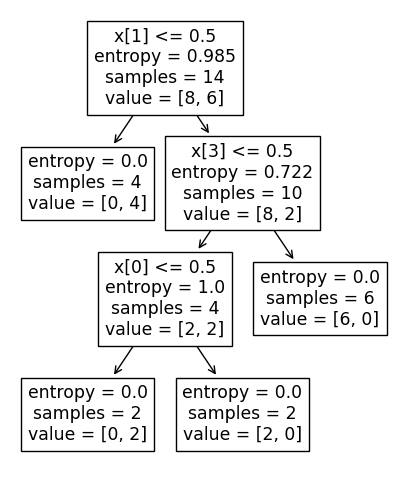

In [ ]:
# Testing scikit-learn's decision tree implementation.
#
#  - scikit-learn's decision tree only allows binary target values.

from sklearn import tree
import numpy as np

clf = tree.DecisionTreeClassifier(criterion="entropy")

# Enter your data here. Each row is an instance. Each column is the attribute.
# Set the first attribute value that appears in the table to be 0, and the next one as 1.
# - for example, for the Commute attribute, 2hr = 0, and 1hr = 1.
#
# X = [[0,0,0,0],
#      [0,0,0,1],
#      ... .... ... ]
#

# mock data, with only 4 instances
# - MODIFY this
#
# Column order: A, B, C, D, E
# Values:         0, 1, as shown in the table.
# Target:         N=0, Y=1
X = [
    [1, 1, 1, 0, 0],
    [1, 1, 0, 1, 1],
    [0, 1, 1, 1, 1],
    [0, 1, 0, 1, 0],
    [1, 1, 1, 0, 1],
    [0, 0, 1, 1, 1],
    [0, 1, 1, 0, 0],
    [0, 1, 0, 0, 1],
    [1, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [1, 0, 1, 1, 1],
    [0, 1, 0, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0]
]

# Enter the target data (AcceptJob) here. 1 = Yes. 0 = No.
# y = [1, 1, .... ]
# - MODIFY this

y = ['N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N']
y_binary = [0 if label == 'N' else 0 for label in y]

clf = clf.fit(X, y)

# Note: value=[a,b] means "a" negative samples, and "b" positive samples [# neg = a, # pos = b].
#       *Note that this order is reversed, compared to the lecture slides, where we had [# pos, #neg], so you have to be careful.
# Note: left branch is attribute value 0, right branch = attribute value 1.
# Note: X[n] means the attribute for the n-th column (n=0 is the first column in),
#       so, for the homework problem, X[0] is Commute. X[1] is JobType, etc.

# Note: You can use some optional arguments to match each column to an attribute name, and indicate the class.
#   - feature_names = <python list>
#   - class_names = <puython list>
plt.figure(figsize=(5, 6))
tree.plot_tree(clf)
plt.show()

# Check if the tree gives the correct answer for the mock dataset above.


# Problem 8 : Perceptron



In [ ]:
BIAS = -1.0

In [ ]:
def plot_decision_boundary(W):
    '''
    plot the decision boundary for weight vector W
    - fully functional
    '''

    x = np.arange(0.0, 1.0, 0.05)
    y = np.arange(1.0, 0.0, -0.05)

    xx, yy = np.meshgrid(x, y)

    output = W[0]*xx + W[1]*yy + W[2]*BIAS

    fig, ax = plt.subplots(1,1)

    ax.imshow(output>=0.0, extent=[0,1,0,1])


In [ ]:
def perceptron(inp, tgt, alpha=0.01, err_target=0.001):
    '''
    implement this

    input:
      inp : input vector array
      tgt : target output array
      alpha : learning rate, default = 0.01
      err_target : target error below which to terminate

    output: print out #epochs, error, and plot the decision boundary

    returns: Weight vector
    '''

    # compute some common sizes
    num_dat = len(tgt)
    inp_dim = len(inp[0])+1        # "+1" to add bias unit

    # add bias to input vectors
    inp = np.append(inp, BIAS*np.ones([num_dat, 1]), axis=1)

    # initialize weight vector : -0.5 ~ 0.5
    W = (np.random.rand(inp_dim)-0.5)

    n = 0
    error = math.inf
    while error > err_target:
        order = np.arange(num_dat)
        np.random.shuffle(order)

        total_error = 0.0

        for i in order:
            # print("Input (with bias at the end)=", end='')
            # print(inp[i], end=', Target=')
            # print(tgt[i])

            # 1.1. Activate output unit
            output = np.dot(W, inp[i])  # sum of weighted inputs
            # 1.2. Compute error
            err = tgt[i] - output
            # 1.3. Adjust weights
            W += alpha * err * inp[i]
            # 1.4. Update total error
            total_error += abs(err)

        # 2. Compute mean epoch error
        error = total_error / num_dat
        # print("Error:", error)
        n += 1  # Increment epoch count

        if (n > 1000):
            break

    print('number of epochs = ' + str(n))
    print('average error = ' + str(error))

    # plot decision boundary after training
    plot_decision_boundary(W)

    return W

number of epochs = 1001
average error = 0.5049239103169605


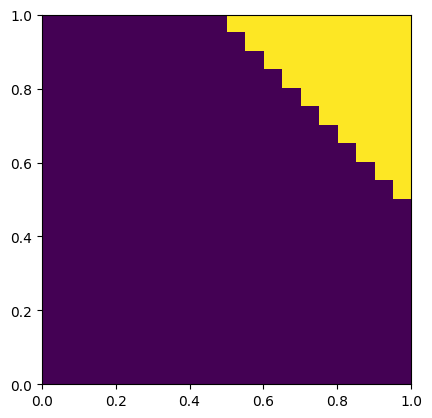

In [ ]:
# AND function
inp_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tgt_and = np.array([-1, -1, -1, 1])

W_and = perceptron(inp_and, tgt_and)

number of epochs = 1001
average error = 0.5050062548728796


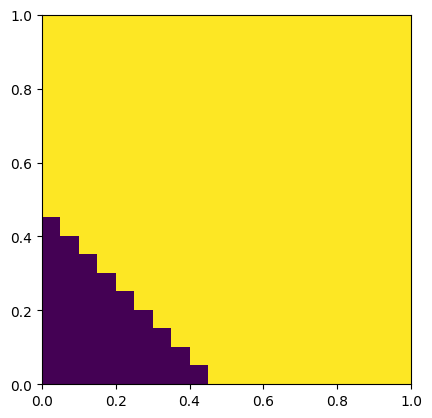

In [ ]:
# OR function
inp_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tgt_or = np.array([-1, 1, 1, 1])

W_or = perceptron(inp_or, tgt_or)

number of epochs = 1001
average error = 1.0098326581837054


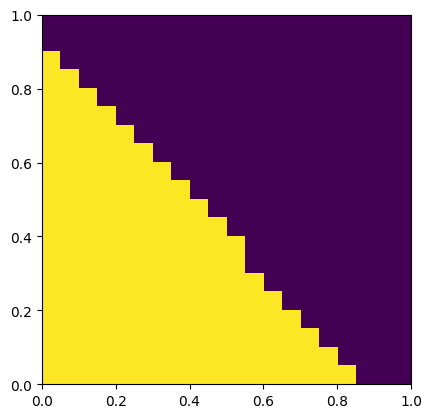

In [ ]:
# XOR function (may not converge)
inp_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tgt_xor = np.array([-1, 1, 1, -1])

W_xor = perceptron(inp_xor, tgt_xor)




# Problem 10: Gradient Descent Exercise (no credit)





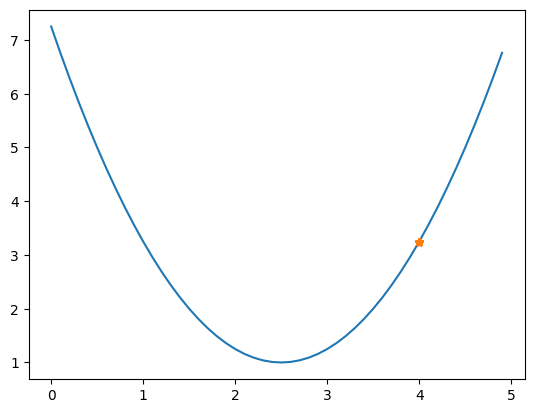

In [ ]:
# Implement your program here:

# Example program. You can modity/extend this.
#
# 1. define error function
# - this is an example (quadratic function) -- you should change it to the function given in problem 4)
# - also, you need to check for the termination condition, rather than using a fixed number of steps.
def E(w):
  '''
  implement this
  '''
  return np.power(w-2.5,2) + 1      # note: np.power() can take scalar or vector as argument.

# 2. define derivative function
def dEdw(w):
  '''
  implement this
  '''
  return 2*(w-2.5)

# 3. gradient descent

w = 4     # initial value
alpha = 0.8   # learning rate  ; try eta=0.8 and eta=0.001

n = 100  # Try changing this depending on the alpha value.

w_t = np.zeros(n)   # this is w at step t
Ew_t = np.zeros(n)  # this is E(w) at step t

for i in range(n):
  '''
  implement this for-loop
  '''
  w_t[i]=w
  Ew_t[i]=E(w)
  # implement this: gradient descent step
  # w = .....

# 4. plot E(w) and the gradient descent steps

# Note: adjust the range below based on the function you're given in the homework problem.
#  - right now the x axis in the plot is 0 to 5 with a step size of 0.1.
x = np.arange(0,5,0.1)

plt.plot(x,E(x),"-",w_t,Ew_t,"*-")


# Problem 12 : CNN

In [ ]:
# Define a Sequential model, which allows stacking layers sequentially
model = tf.keras.Sequential([
    # Add a Convolutional 2D layer with 25 filters, each filter being a 5x5 matrix
    # This layer applies the rectified linear unit (ReLU) activation function
    # The input shape for this layer is 28x28 pixels with a single channel (grayscale)
    tf.keras.layers.Conv2D(25, (5, 5), activation='relu', input_shape=(28, 28, 1)),

    # Add another Convolutional 2D layer with 25 filters, each filter being a 5x5 matrix
    # This layer also uses the ReLU activation function
    # The input shape is inferred from the previous layer's output
    tf.keras.layers.Conv2D(25, (5, 5), activation='relu'),
])

# Load the MNIST dataset using Keras datasets module
mnist = tf.keras.datasets.mnist

# Load the MNIST dataset and unpack it into training images and labels
# The second variable (_) is used to discard the testing data (not used in this case)
(train_images, train_labels), _ = mnist.load_data()

# Normalize the pixel values of the training images to a range between 0 and 1
train_images = train_images / 255.0

# Display a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 25)        650       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 25)        15650     
                                                                 
Total params: 16300 (63.67 KB)
Trainable params: 16300 (63.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


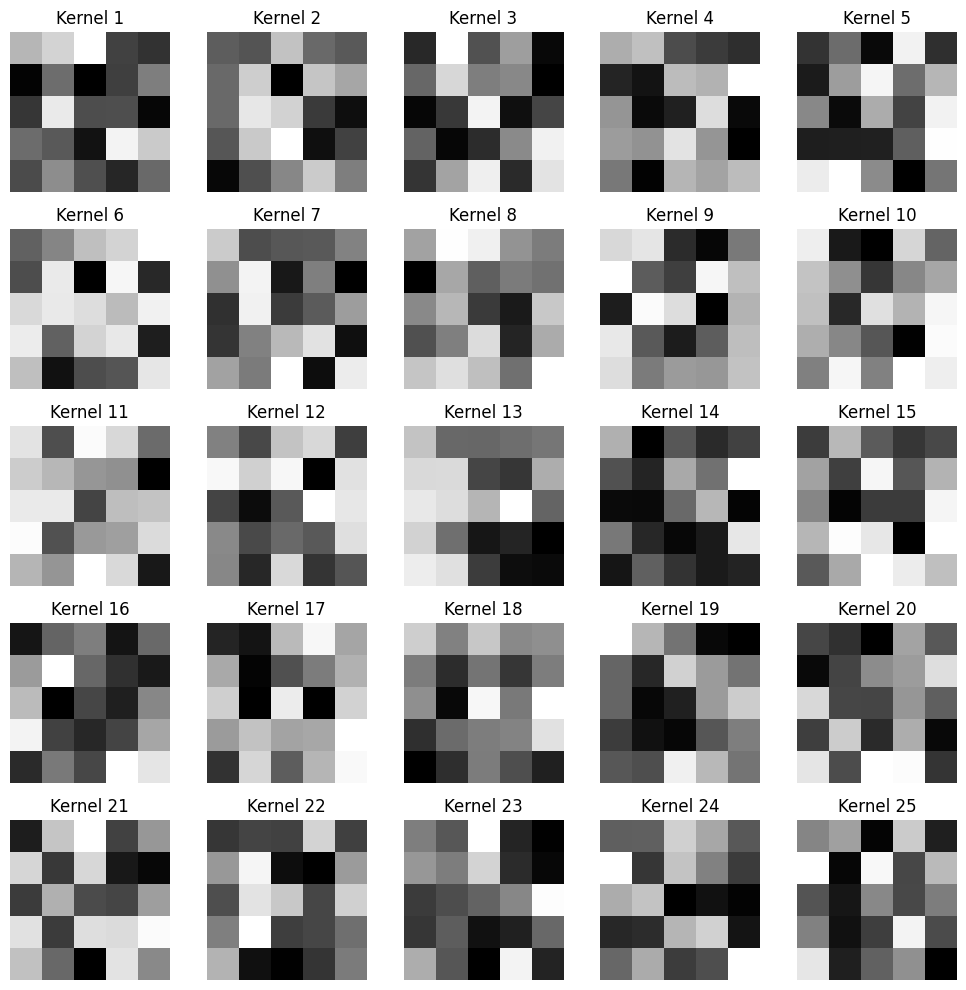

In [ ]:
# Access the weights of the first convolutional layer
conv1_weights = model.layers[0].get_weights()[0]

# Plot the convolutional kernels
num_kernels = conv1_weights.shape[3]  # Number of kernels in the first conv layer

# Set up subplots based on the number of kernels
rows = 5  # Change this as needed based on the number of kernels
cols = num_kernels // rows

plt.figure(figsize=(10, 10))
for i in range(num_kernels):
    plt.subplot(rows, cols, i+1)
    plt.imshow(conv1_weights[:, :, 0, i], cmap='gray')
    plt.axis('off')
    plt.title(f'Kernel {i+1}')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 286ms/step


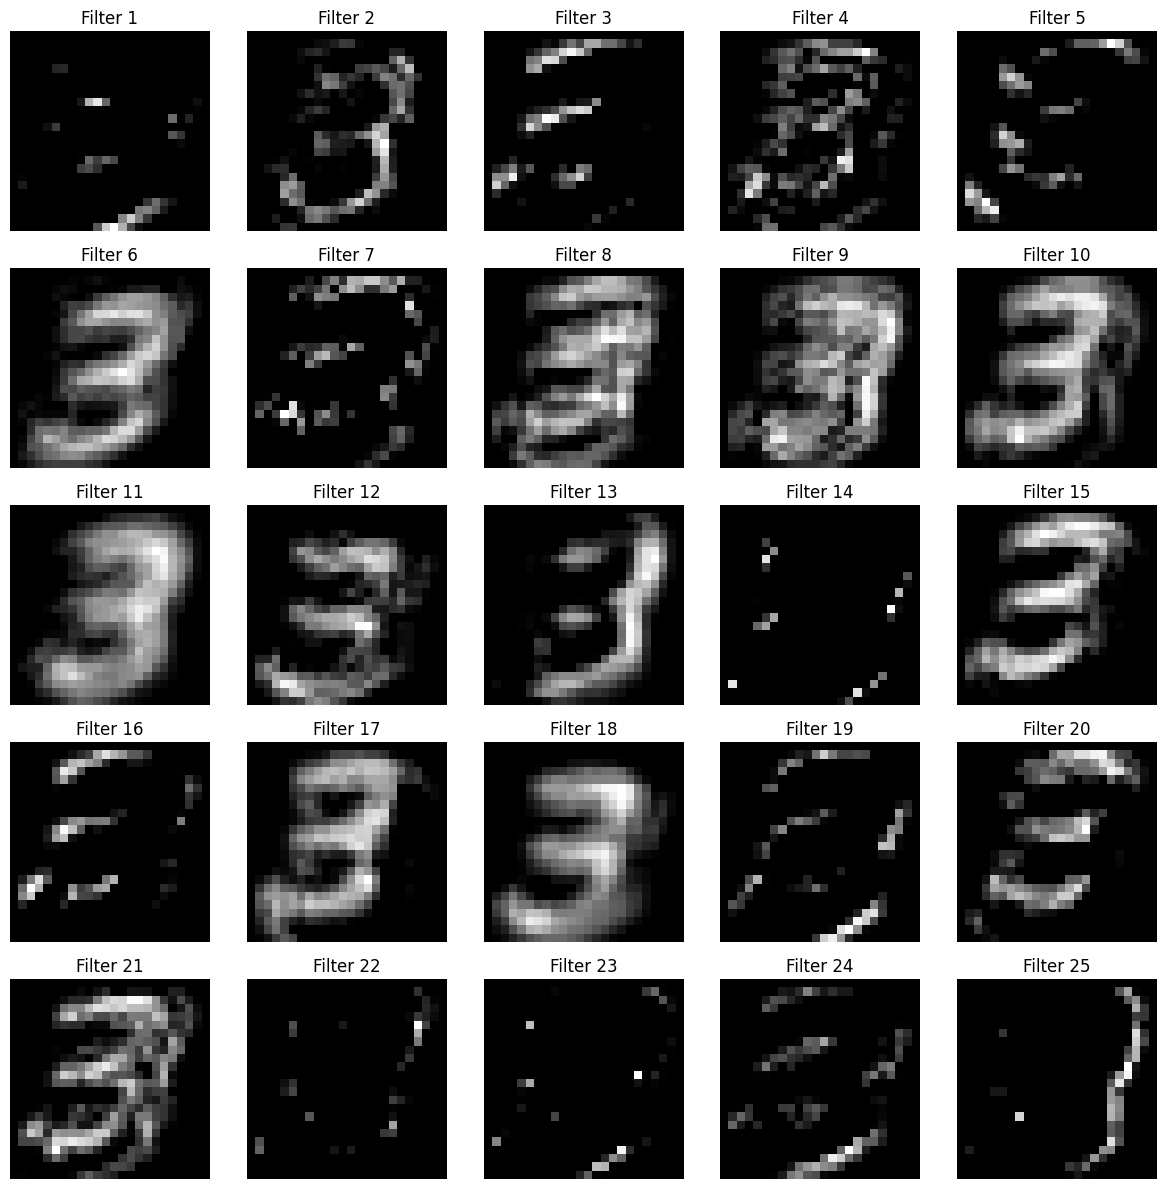

In [ ]:
# Select an input image from the category "3"
category_3_indices = np.where(train_labels == 3)[0]
image_index = category_3_indices[0]  # Change this index to visualize different "3" images

input_image = train_images[image_index]
input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension
input_image = np.expand_dims(input_image, axis=-1)  # Add channel dimension

# Create a model that extracts feature maps from the first conv layer
activation_model = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)

# Get the feature maps for the selected input image
feature_maps = activation_model.predict(input_image)

# Plot the feature maps
num_filters = feature_maps.shape[3]

plt.figure(figsize=(12, 12))
for i in range(num_filters):
    plt.subplot(5, 5, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    plt.axis('off')
    plt.title(f'Filter {i+1}')

plt.tight_layout()
plt.show()

https://chat.openai.com/share/9693d10c-1e36-4734-a9b7-1c1f11f70524